# TESTING AMPHI

## GMM AND KMEANS

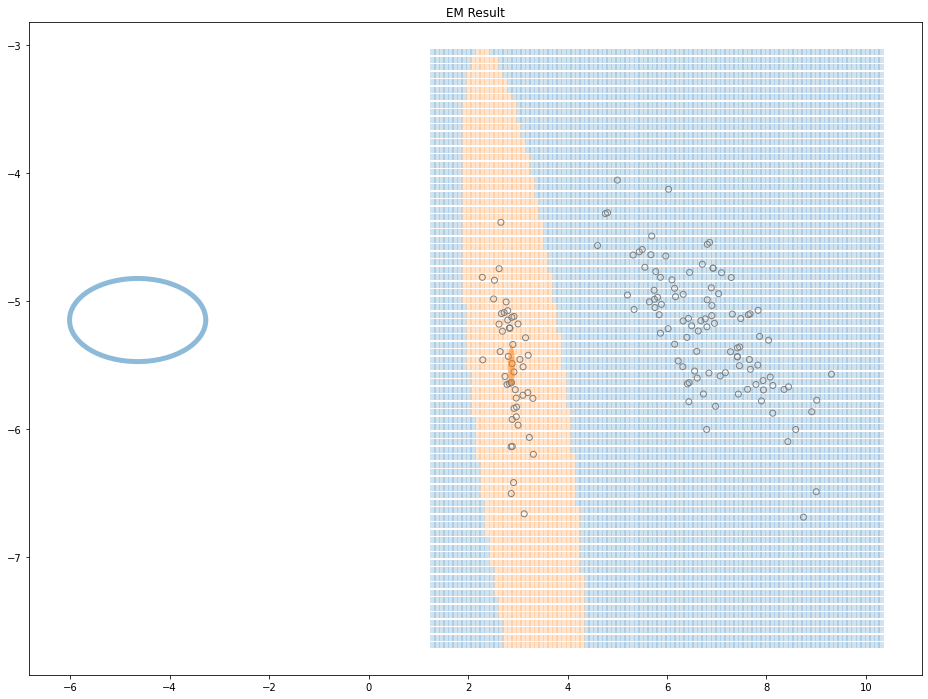

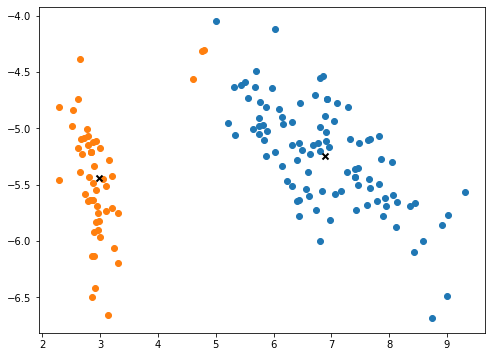

In [29]:
import amphi
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = pd.read_csv("data/Iris.csv")
# print(X.head())
X = X.drop(["Species", "Id"], axis=1)
# print(X.head())
X_arr = X.to_numpy()
# print('\n',X_arr)
# print(X_arr.shape)
# fig, ax = plt.subplots(figsize=(8,6))
# ax.scatter(x=X_arr[:, 0], y=X_arr[:, 2], cmap="plasma", edgecolors='black')
# plt.show()
# , "SepalWidthCm", "PetalWidthCm"

# Using PCA to reduce dimension of the data
pca = amphi.PCA(2)
x_new = pca.reduce(X_arr)
# Initializing GMM Classifier
clf = amphi.GMM(2, x_new, 50)
results = clf.start_EM()
clf.plot()

# Initializing Kmeans Classifier
clf2 = amphi.Kmeans(2)
clf2.predict(x_new)
clf2.plot()

## Logistic Regression


In [4]:
import amphi
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

x = np.dot(X_train.T, y_train)
weights = np.zeros(X.shape[1])
xx = np.dot(X_train, weights) + 0
s = 1/(1 + np.exp(-xx))
s.shape
ss = s - y_train
ss.shape
r = np.dot(X_train.T, ss)
r

(455, 30) (455,)


array([-2.68302000e+02, -7.32395000e+02, -1.46602000e+03,  1.59064000e+04,
       -4.45400500e+00,  7.43195000e-01,  6.72361200e+00,  3.67936950e+00,
       -8.49285000e+00, -3.69392500e+00,  1.00695000e+01, -7.07409500e+01,
        7.35063500e+01,  3.01957950e+03, -4.47879500e-01, -4.60266500e-01,
       -3.95015450e-01, -1.70213500e-01, -1.19507500e+00, -1.97956650e-01,
       -1.39846000e+02, -8.71180000e+02, -5.85300000e+02,  3.88139500e+04,
       -5.51307000e+00,  5.26165000e+00,  1.38246155e+01,  4.63780450e+00,
       -1.08877500e+01, -3.67947500e+00])

In [5]:
clf_logr = amphi.LogisticRegression()

In [6]:
clf_logr.fit(X_train, y_train)
labels = clf_logr.predict(X_test)

print(len(labels))

114


/home/freyr/dev/python/projects/amphi/amphi.py:138: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [7]:
clf_logr.accuracy(labels, y_test, log=True)


The accuracy of our Regressor is: 94.73684210526315


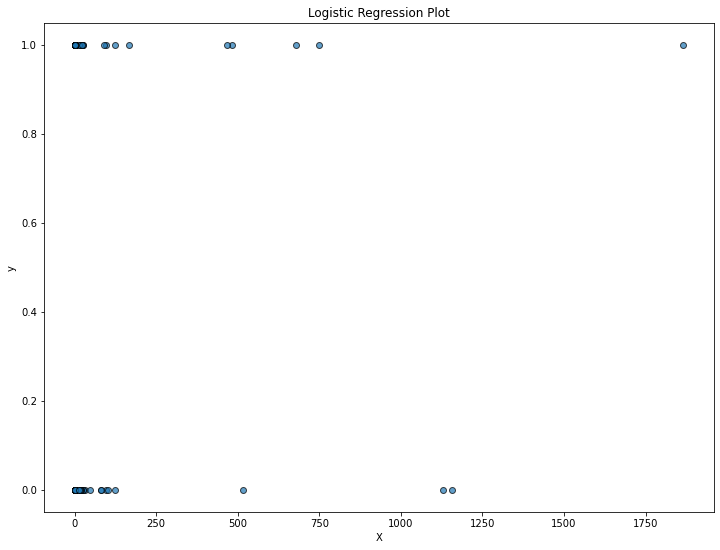

In [8]:
clf_logr.plot(X_test)

## ROUGH WORK

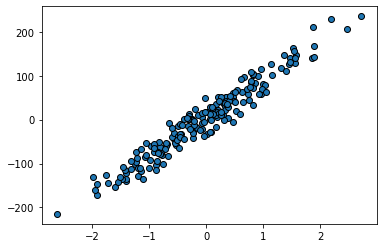

In [9]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=1, noise = 20, bias=2.3, random_state=42)
plt.scatter(X[:,0], y, edgecolors='black')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.dtype, y_train.dtype

(dtype('float64'), dtype('float64'))

In [11]:
clf_lin = amphi.LinearRegerssion()
clf_lin.fit(X_train, y_train)
preds = clf_lin.predict(X_test)


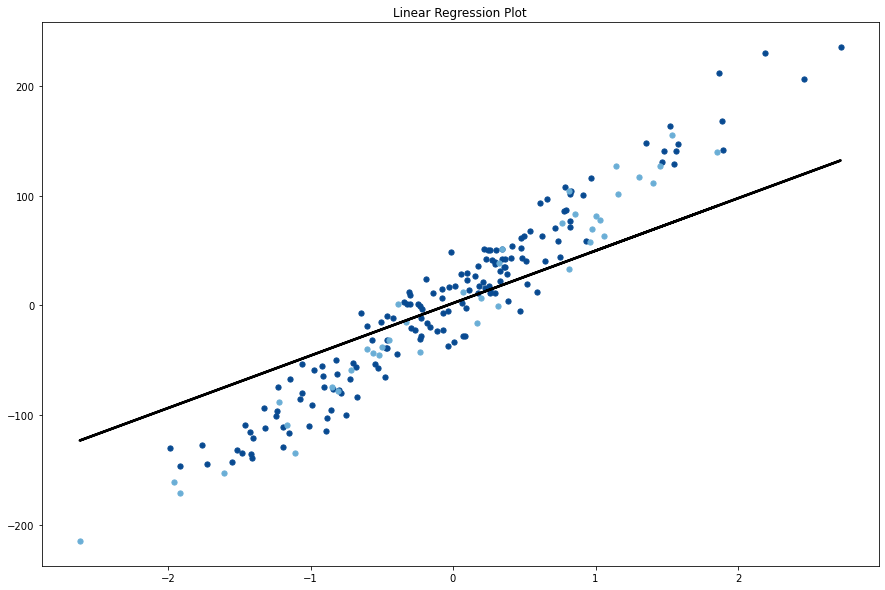

In [12]:
clf_lin.plot(X, X_train, X_test, y_train, y_test)

In [13]:
# clf_logr.accuracy(labels, y_test, log=True)
z = X_test.ravel()
z = z[:y_test.shape[0]]
z.shape, y_test.shape


((40,), (40,))

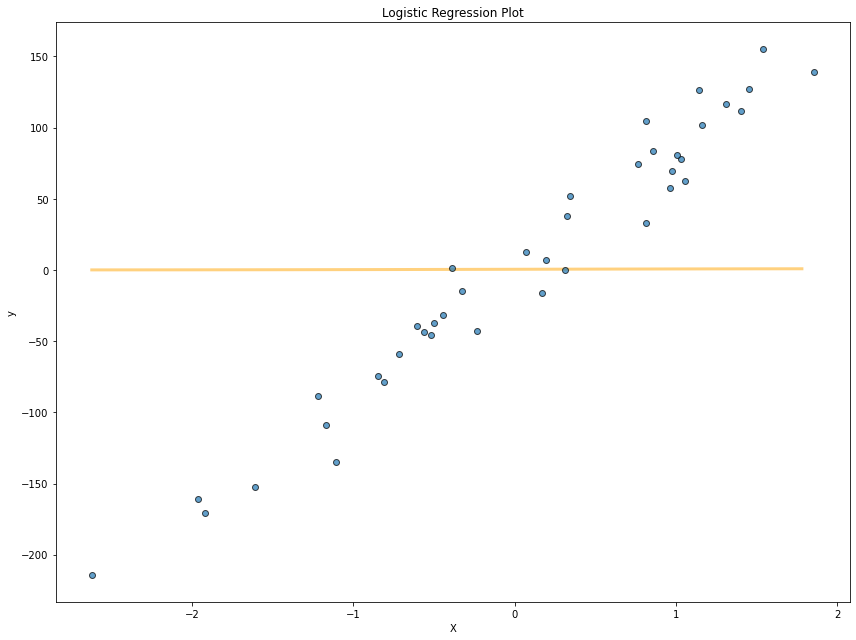

In [14]:
plt.figure(1, figsize=(12, 9))
plt.clf()
plt.scatter(z, y_test, edgecolor="black", zorder=20, alpha=0.7)

temp = np.arange(min(z), max(z), 0.2)
temp_sig = clf_logr._sigmoid(temp)
plt.plot(temp, temp_sig, linewidth=3, color='orange', alpha=0.5)

plt.title("Logistic Regression Plot")
plt.ylabel("y")
plt.xlabel("X")

plt.tight_layout()
plt.show()
# plt.plot(X_test, labels, color="red", linewidth=3, alpha=0.2)

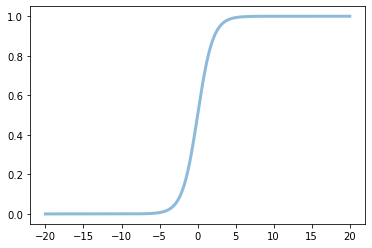

In [15]:
t = np.arange(-20, 20, 0.002)
t_s = clf_logr._sigmoid(t)

plt.plot(t, t_s, linewidth=3, alpha=0.5)